### Agenda
* Linear SVM
* Reduction to Linear Regression
* Working with Kernals in TensorFlow
* Implementing Non-Linear SVM
* Multi-Class SVM

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf
from sklearn import datasets

In [58]:
sess = tf.Session()

iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

In [59]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)

test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [60]:
len(train_indices)

120

In [61]:
len(x_vals)

150

In [62]:
len(test_indices)

30

In [63]:
batch_size = 100

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [64]:
model_output = tf.sub(tf.matmul(x_data, A), b)

In [65]:
## Finding loss
l2_norm = tf.reduce_sum(tf.square(A))

alpha = tf.constant([0.1])

classification_term = tf.reduce_mean(tf.maximum(0., tf.sub(1., tf.mul(model_output, y_target))))

loss = tf.add(classification_term, tf.mul(alpha, l2_norm))

In [66]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [67]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)


In [68]:
init = tf.global_variables_initializer()
sess.run(init)

In [69]:
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(5000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
    
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[-0.34523103]
 [-0.18663707]] b = [[-1.45163822]]
Loss = [ 0.57134926]
Step #200 A = [[-0.27671909]
 [-0.45251468]] b = [[-1.49803817]]
Loss = [ 0.60382283]
Step #300 A = [[-0.24077649]
 [-0.66617125]] b = [[-1.54403806]]
Loss = [ 0.49689633]
Step #400 A = [[-0.20588113]
 [-0.82820427]] b = [[-1.59113729]]
Loss = [ 0.41474882]
Step #500 A = [[-0.17478594]
 [-0.96079046]] b = [[-1.64013684]]
Loss = [ 0.38232419]
Step #600 A = [[-0.16745102]
 [-1.06877208]] b = [[-1.68523657]]
Loss = [ 0.38999704]
Step #700 A = [[-0.14667226]
 [-1.15125763]] b = [[-1.73383641]]
Loss = [ 0.33338219]
Step #800 A = [[-0.14778395]
 [-1.21021497]] b = [[-1.77573609]]
Loss = [ 0.34129882]
Step #900 A = [[-0.15494168]
 [-1.26253903]] b = [[-1.81873572]]
Loss = [ 0.36973751]
Step #1000 A = [[-0.15222338]
 [-1.29479861]] b = [[-1.86093569]]
Loss = [ 0.31407648]
Step #1100 A = [[-0.14843078]
 [-1.3119756 ]] b = [[-1.90163553]]
Loss = [ 0.34300774]
Step #1200 A = [[-0.15700923]
 [-1.32157207]] b = [[

In [70]:
test_accuracy

[0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,
 0.76666665,

In [71]:
train_accuracy

[0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,
 0.64166665,

In [72]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]

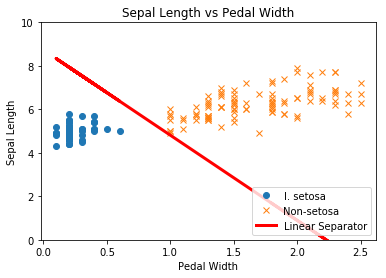

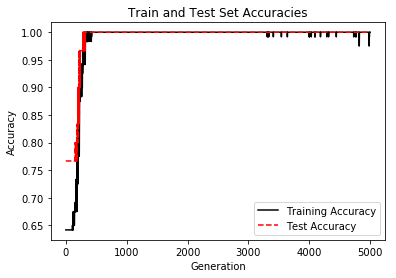

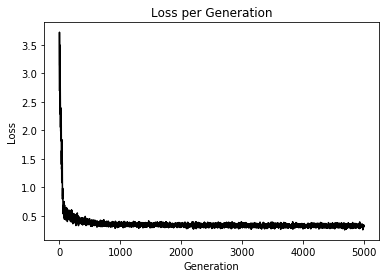

In [73]:
plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

### Working with Kernels in tensorFlow

In [74]:
sess = tf.Session()

In [75]:
(x_vals, y_vals) = datasets.make_circles(n_samples=500, factor=.5, noise=.1)

y_vals = np.array([1 if y==1 else -1 for y in y_vals])

class1_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==1]
class1_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==1]
class2_x = [x[0] for i,x in enumerate(x_vals) if y_vals[i]==-1]
class2_y = [x[1] for i,x in enumerate(x_vals) if y_vals[i]==-1]

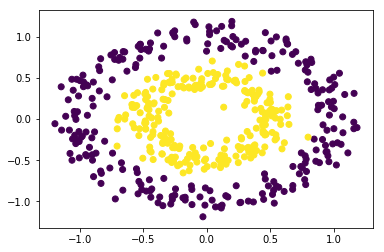

In [96]:
plt.scatter(x_vals[:,0][:,np.newaxis], x_vals[:,1][:,np.newaxis],c=y_vals)

In [92]:
y_vals

array([-1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
        1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1

In [97]:
batch_size = 250
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1,batch_size]))

In [98]:
#Gaussian kernel
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.sub(dist, tf.mul(2., tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.mul(gamma, tf.abs(sq_dists))) 

In [99]:
model_output = tf.matmul(b, my_kernel)

first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_term = tf.reduce_sum(tf.mul(my_kernel, tf.mul(b_vec_cross, y_target_cross)))
loss = tf.neg(tf.sub(first_term, second_term)) 

In [100]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.sub(rA, tf.mul(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.mul(gamma, tf.abs(pred_sq_dist)))

prediction_output = tf.matmul(tf.mul(tf.transpose(y_target),b), pred_kernel)
prediction = tf.sign(prediction_output-tf.reduce_mean(prediction_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [102]:
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [103]:
loss_vec = []
batch_accuracy = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x,
                                             y_target: rand_y,
                                             prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    if (i+1)%100==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))

Step #100
Loss = 146.794
Step #200
Loss = 83.4193
Step #300
Loss = 38.6176
Step #400
Loss = 36.9307
Step #500
Loss = 18.8691


In [104]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
[grid_predictions] = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

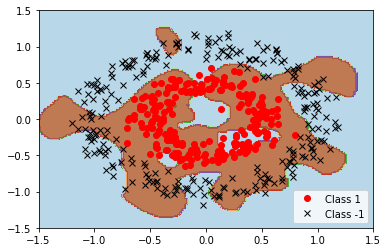

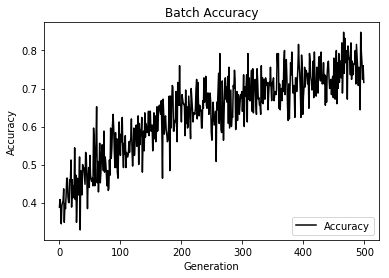

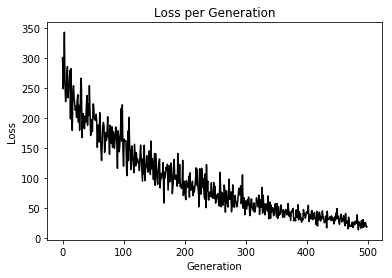

In [105]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='Class 1')
plt.plot(class2_x, class2_y, 'kx', label='Class -1')
plt.legend(loc='lower right')
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

### Implementing a Multi-Class SVM

In [106]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals1 = np.array([1 if y==0 else -1 for y in iris.target])
y_vals2 = np.array([1 if y==1 else -1 for y in iris.target])
y_vals3 = np.array([1 if y==2 else -1 for y in iris.target])
y_vals = np.array([y_vals1, y_vals2, y_vals3])
class1_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==0]
class1_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==0]
class2_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==1]
class2_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==1]
class3_x = [x[0] for i,x in enumerate(x_vals) if iris.target[i]==2]
class3_y = [x[1] for i,x in enumerate(x_vals) if iris.target[i]==2]

In [107]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[3, None], dtype=tf.float32)
prediction_grid = tf.placeholder(shape=[None, 2], dtype=tf.float32)

b = tf.Variable(tf.random_normal(shape=[3,batch_size]))

In [108]:
gamma = tf.constant(-10.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1,1])
sq_dists = tf.add(tf.sub(dist, tf.mul(2., tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.mul(gamma, tf.abs(sq_dists)))

In [109]:
def reshape_matmul(mat):
    v1 = tf.expand_dims(mat, 1)
    v2 = tf.reshape(v1, [3, batch_size, 1])
    return(tf.batch_matmul(v2, v1))

In [110]:
model_output = tf.matmul(b, my_kernel)
first_term = tf.reduce_sum(b)
b_vec_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = reshape_matmul(y_target)

second_term = tf.reduce_sum(tf.mul(my_kernel, tf.mul(b_vec_cross, y_target_cross)),[1,2])
loss = tf.reduce_sum(tf.neg(tf.sub(first_term, second_term)))

In [111]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1),[-1,1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1),[-1,1])
pred_sq_dist = tf.add(tf.sub(rA, tf.mul(2., tf.matmul(x_data, tf.transpose(prediction_grid)))), tf.transpose(rB))
pred_kernel = tf.exp(tf.mul(gamma, tf.abs(pred_sq_dist)))

In [112]:
prediction_output = tf.matmul(tf.mul(y_target,b), pred_kernel)
prediction = tf.arg_max(prediction_output-tf.expand_dims(tf.reduce_mean(prediction_output,1), 1), 0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(y_target,0)), tf.float32))

In [113]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [114]:
oss_vec = []
batch_accuracy = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[:,rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y, prediction_grid:rand_x})
    batch_accuracy.append(acc_temp)
    
    if (i+1)%25==0:
        print('Step #' + str(i+1))
        print('Loss = ' + str(temp_loss))

Step #25
Loss = -6.27616
Step #50
Loss = -26.462
Step #75
Loss = -24.5546
Step #100
Loss = -27.8252


In [115]:
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = sess.run(prediction, feed_dict={x_data: rand_x,
                                                   y_target: rand_y,
                                                   prediction_grid: grid_points})
grid_predictions = grid_predictions.reshape(xx.shape)

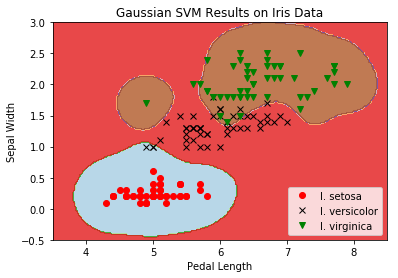

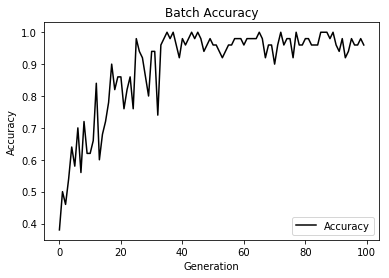

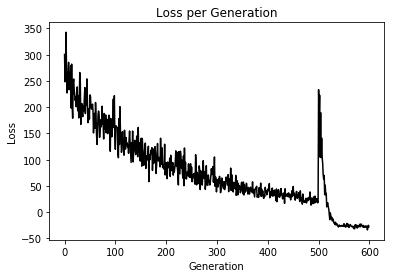

In [116]:
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='I. setosa')
plt.plot(class2_x, class2_y, 'kx', label='I. versicolor')
plt.plot(class3_x, class3_y, 'gv', label='I. virginica')
plt.title('Gaussian SVM Results on Iris Data')
plt.xlabel('Pedal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='lower right')
plt.ylim([-0.5, 3.0])
plt.xlim([3.5, 8.5])	
plt.show()

plt.plot(batch_accuracy, 'k-', label='Accuracy')
plt.title('Batch Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()